In [1]:
import os 
import numpy as np

In [54]:
X_train = []
Y_train = []

In [55]:
os.listdir('./data')

['none.npy', 'paper.npy', 'rock.npy', 'scissor.npy']

In [56]:
path_data = './data'

classes_dir = {
	'rock':0,
	'paper':1,
	'scissor':2,
	'none':3
}

In [57]:
a = np.ones((10,))
print(a.shape)
print(a*classes_dir['rock'])

(10,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
for directory in os.listdir(path_data):
    images_path = os.path.join(path_data,directory)
    data = np.load(images_path)
    m = data.shape[0]
    print(m)
    y = np.ones((m,))
    y = y*classes_dir[directory[:-4]]
    Y_train.append(y)
    X_train.append(data)

200
200
200
200


In [59]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [60]:
X_train = X_train.reshape(800,-1)
Y_train = Y_train.reshape((800,-1))

In [61]:
Y_train.shape

(800, 1)

In [62]:
X_train.shape

(800, 30000)

In [63]:
data = np.ones(shape=(800,30001))
print(data.shape)
data[:,0] = Y_train.reshape((800))

(800, 30001)


In [65]:
data[:,0]

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [66]:
data[:,1:] = X_train

In [68]:
X_train = data[:,1:]/255.0
Y_train = data[:,0]

In [69]:
import matplotlib.pyplot as plt

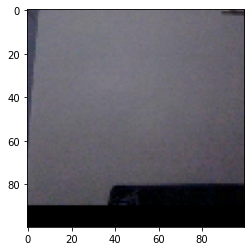

3.0

In [70]:
plt.imshow(X_train[312].reshape((100,100,3)))
plt.show()
Y_train[312]

In [19]:
from keras.layers import *
from keras.models import Sequential

In [20]:
from keras.utils import np_utils

In [71]:
Y_train = np_utils.to_categorical(Y_train)

In [72]:
Y_train.shape

(800, 4)

In [73]:
X_train.shape

(800, 30000)

In [74]:
X_train = X_train.reshape((-1,100,100,3))

In [67]:
from sklearn.utils import shuffle

data = shuffle(data)

In [75]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 64)       

In [76]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [80]:
model.fit(X_train,Y_train,epochs=2,batch_size=128,validation_split=0.2)

Epoch 1/2
5/5 [==============================] - 11s 2s/step - loss: 0.3477 - acc: 0.8672 - val_loss: 0.3870 - val_acc: 0.8625
Epoch 2/2
5/5 [==============================] - 11s 2s/step - loss: 0.3286 - acc: 0.8703 - val_loss: 0.3759 - val_acc: 0.8500


In [81]:
model.save('rock_paper_scissor_model_new_1.h5')

In [75]:
# test

In [82]:
val = model.predict(X_train)

In [83]:
val

array([[7.4878847e-03, 4.3117635e-02, 9.4939435e-01, 1.1152281e-07],
       [1.0534994e-03, 1.6651597e-03, 2.2232386e-04, 9.9705899e-01],
       [8.5868669e-01, 1.3601597e-01, 5.2973004e-03, 5.5414690e-11],
       ...,
       [5.4934967e-02, 9.2827863e-01, 1.6786413e-02, 1.5166509e-09],
       [7.2437120e-03, 1.0753933e-02, 9.8199731e-01, 5.0703939e-06],
       [1.0574669e-01, 8.1330910e-02, 8.1291056e-01, 1.1831303e-05]],
      dtype=float32)

In [139]:
vv = model.predict(que)

In [140]:
vv

array([[2.6885453e-03, 9.5594460e-01, 4.1366760e-02, 2.3066474e-10]],
      dtype=float32)

In [141]:
que = X_train[0]
que = que.reshape((-1,100,100,3))
print(que.shape)

(1, 100, 100, 3)


In [125]:
val.shape

(800, 4)

In [84]:
ans = np.argmax(val,axis=1)

In [85]:
ans.shape

(800,)

In [86]:
ans

array([2, 3, 0, 1, 1, 0, 1, 2, 3, 2, 2, 1, 1, 0, 0, 1, 3, 3, 0, 1, 1, 3,
       3, 3, 0, 1, 0, 2, 2, 3, 0, 2, 3, 3, 2, 3, 0, 0, 0, 1, 1, 1, 0, 3,
       0, 2, 3, 3, 3, 3, 1, 3, 3, 3, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 3, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 3, 1, 0, 1, 0, 1, 1,
       3, 0, 2, 3, 1, 0, 1, 0, 1, 1, 3, 0, 2, 1, 3, 3, 2, 1, 2, 3, 1, 1,
       1, 0, 2, 1, 3, 2, 0, 1, 3, 3, 2, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 3,
       1, 2, 3, 2, 1, 2, 1, 2, 1, 0, 1, 3, 1, 1, 2, 0, 0, 2, 0, 3, 3, 3,
       3, 0, 1, 3, 1, 3, 2, 2, 0, 1, 1, 3, 1, 3, 1, 3, 3, 2, 3, 3, 1, 1,
       3, 2, 3, 1, 1, 2, 3, 2, 3, 1, 1, 3, 3, 0, 2, 3, 2, 3, 0, 0, 3, 2,
       0, 1, 2, 1, 3, 3, 1, 3, 1, 2, 2, 0, 3, 2, 1, 0, 0, 0, 3, 2, 0, 2,
       0, 2, 1, 1, 0, 0, 1, 3, 3, 0, 3, 3, 0, 2, 0, 1, 2, 1, 2, 3, 1, 2,
       3, 2, 1, 1, 0, 2, 1, 2, 3, 2, 3, 3, 2, 1, 2, 1, 2, 0, 1, 3, 0, 1,
       1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1,
       0, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 0, 0, 3,

In [86]:
print(len(classes_dir.values()))

4


In [90]:
a = classes_dir.keys()

In [92]:
a = list(a)

In [97]:
a

['rock', 'paper', 'scissor', 'none']

In [94]:
classes_dir[a[0]]

0

In [95]:
dir = {}
dir[0] = a[0]

In [101]:
class_dir = classes_dir

In [102]:
def rev_class():
	dir = {}
	m = len(class_dir.keys())
	k = list(class_dir.keys())
	for i in range(m):
		dir[i] = k[i]

	return dir

rev_class_dir = rev_class()

In [103]:
rev_class_dir

{0: 'rock', 1: 'paper', 2: 'scissor', 3: 'none'}

In [107]:
v = X_train[0]

In [110]:
v = v.reshape((-1,100,100,1))

In [111]:
model.predict(v)

array([[7.1179302e-09, 6.0430407e-09, 4.9470842e-08, 9.9999988e-01]],
      dtype=float32)

In [112]:
type(v)

numpy.ndarray